<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/power_analysis__diet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.What is the power of a one-tailed t-test, with a significance level of 0.01, 35 people in each group,and an effect size equal to 0.75?

In [ ]:
install.packages('pwr')

In [ ]:
library(pwr)

In [ ]:
 pwr.t.test(n=35,d=0.75,sig.level=0.01,alternative="greater")


     Two-sample t test power calculation 

              n = 35
              d = 0.75
      sig.level = 0.01
          power = 0.7728971
    alternative = greater

NOTE: n is number in *each* group


QUESTION 3

In [ ]:
install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)
library(AICcmodavg)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘textshaping’, ‘lme4’, ‘pbapply’, ‘plyr’, ‘TMB’, ‘RcppArmadillo’, ‘RcppEigen’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’, ‘unmarked’, ‘VGAM’, ‘xtable’


Warning message in install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", :
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", :
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", :
“installation of package ‘tidyverse’ had non-zero exit status”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl

In [ ]:
diet<- read.csv("/content/diet - diet.csv")
head(diet)

,id,gender,age,height,diet.type,initial.weight,final.weight
,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>
1,1,Female,22,159,A,58,54.2
2,2,Female,46,192,A,60,54.0
3,3,Female,55,170,A,64,63.3
4,4,Female,33,171,A,64,61.1
5,5,Female,50,170,A,65,62.2
6,6,Female,50,201,A,66,64.0


In [ ]:
summary(diet)

       id           gender               age            height     
 Min.   : 1.00   Length:76          Min.   :16.00   Min.   :141.0  
 1st Qu.:19.75   Class :character   1st Qu.:32.50   1st Qu.:163.8  
 Median :40.50   Mode  :character   Median :39.00   Median :169.0  
 Mean   :39.87                      Mean   :39.22   Mean   :170.8  
 3rd Qu.:59.25                      3rd Qu.:47.25   3rd Qu.:175.2  
 Max.   :78.00                      Max.   :60.00   Max.   :201.0  
  diet.type         initial.weight   final.weight  
 Length:76          Min.   :58.00   Min.   :53.00  
 Class :character   1st Qu.:66.00   1st Qu.:61.95  
 Mode  :character   Median :72.00   Median :68.95  
                    Mean   :72.29   Mean   :68.34  
                    3rd Qu.:78.00   3rd Qu.:73.67  
                    Max.   :88.00   Max.   :84.50  

In [ ]:
diet$weight.loss=diet$initial.weight-diet$final.weight
head(diet,5)

,id,gender,age,height,diet.type,initial.weight,final.weight,weight.loss
,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,1,Female,22,159,A,58,54.2,3.8
2,2,Female,46,192,A,60,54.0,6.0
3,3,Female,55,170,A,64,63.3,0.7
4,4,Female,33,171,A,64,61.1,2.9
5,5,Female,50,170,A,65,62.2,2.8


In [ ]:
#converting categorical column to numerical column
diet$diet.type<-c(A=1,B=2,C=3)[diet$diet.type]
diet$gender<-c(Female=1,Male=2)[diet$gender]
head(diet,5)

,id,gender,age,height,diet.type,initial.weight,final.weight,weight.loss
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,22,159,1,58,54.2,3.8
2,2,1,46,192,1,60,54.0,6.0
3,3,1,55,170,1,64,63.3,0.7
4,4,1,33,171,1,64,61.1,2.9
5,5,1,50,170,1,65,62.2,2.8


In [ ]:
#one way anova for diet type
one.way <- aov(diet.type ~ weight.loss, data = diet)

In [ ]:
summary(one.way)

            Df Sum Sq Mean Sq F value  Pr(>F)   
weight.loss  1   4.88   4.885   7.858 0.00645 **
Residuals   74  46.00   0.622                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
one.way

Call:
   aov(formula = diet.type ~ weight.loss, data = diet)

Terms:
                weight.loss Residuals
Sum of Squares      4.88468  45.99690
Deg. of Freedom           1        74

Residual standard error: 0.7884032
Estimated effects may be unbalanced

In [ ]:
one.way1 <- aov(age ~ weight.loss, data = diet)

In [ ]:
summary(one.way1)

            Df Sum Sq Mean Sq F value Pr(>F)
weight.loss  1     37    37.5   0.379   0.54
Residuals   74   7326    99.0               

In [ ]:
one.way1

Call:
   aov(formula = age ~ weight.loss, data = diet)

Terms:
                weight.loss Residuals
Sum of Squares       37.496  7325.702
Deg. of Freedom           1        74

Residual standard error: 9.949672
Estimated effects may be unbalanced

In [ ]:
one.way2 <- aov(height ~ weight.loss, data = diet)

In [ ]:
summary(one.way2)

            Df Sum Sq Mean Sq F value Pr(>F)
weight.loss  1    126   125.6   0.963   0.33
Residuals   74   9656   130.5               

In [ ]:
one.way2

Call:
   aov(formula = height ~ weight.loss, data = diet)

Terms:
                weight.loss Residuals
Sum of Squares      125.613  9655.585
Deg. of Freedom           1        74

Residual standard error: 11.42282
Estimated effects may be unbalanced

In [ ]:
#Two-way ANOVA
two.way <- aov(diet.type ~ weight.loss + height, data = diet)

In [ ]:
summary(two.way)

            Df Sum Sq Mean Sq F value  Pr(>F)   
weight.loss  1   4.88   4.885   7.813 0.00662 **
height       1   0.36   0.355   0.568 0.45347   
Residuals   73  45.64   0.625                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
#Adding interactions between variables
interaction <- aov(diet.type ~ weight.loss *height, data = diet)
interaction

Call:
   aov(formula = diet.type ~ weight.loss * height, data = diet)

Terms:
                weight.loss   height weight.loss:height Residuals
Sum of Squares      4.88468  0.35514            1.97819  43.66356
Deg. of Freedom           1        1                  1        72

Residual standard error: 0.7787415
Estimated effects may be unbalanced

In [ ]:
summary(interaction)

                   Df Sum Sq Mean Sq F value  Pr(>F)   
weight.loss         1   4.88   4.885   8.055 0.00589 **
height              1   0.36   0.355   0.586 0.44662   
weight.loss:height  1   1.98   1.978   3.262 0.07508 . 
Residuals          72  43.66   0.606                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

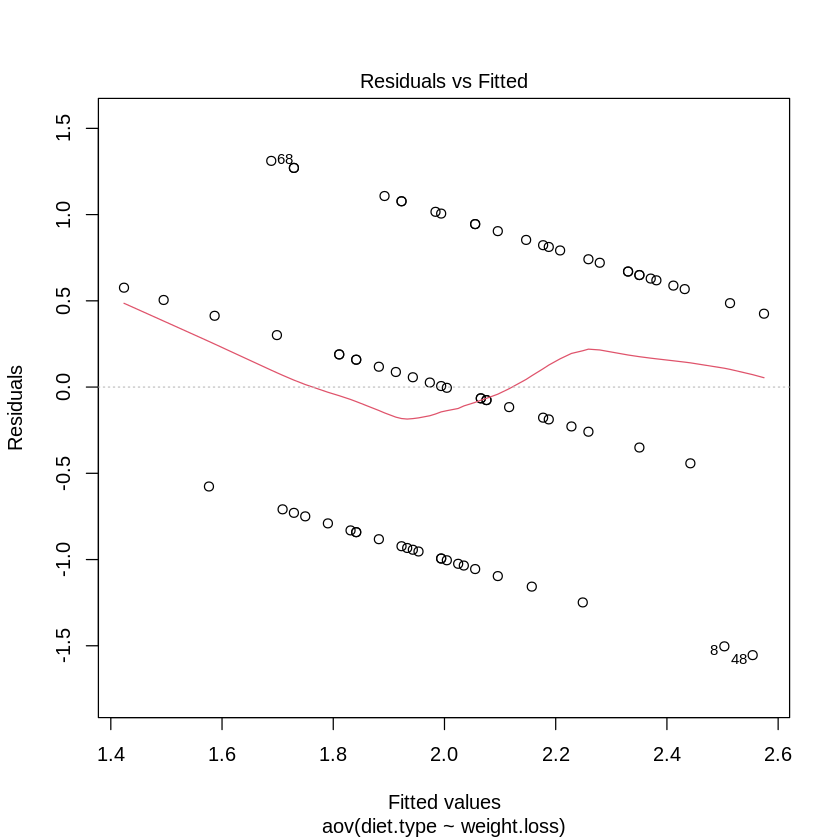

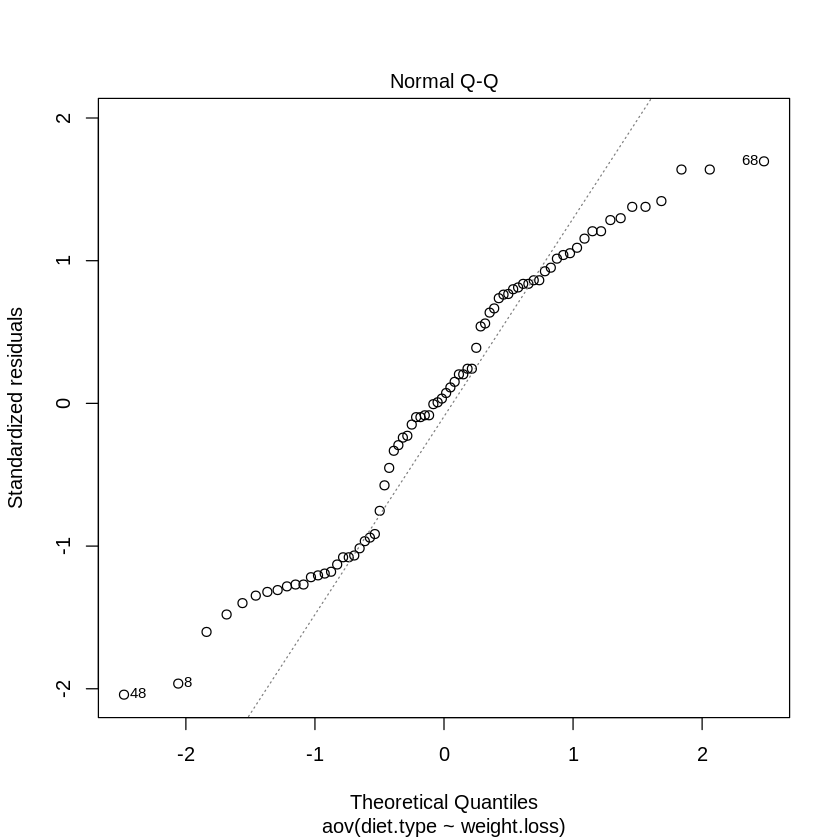

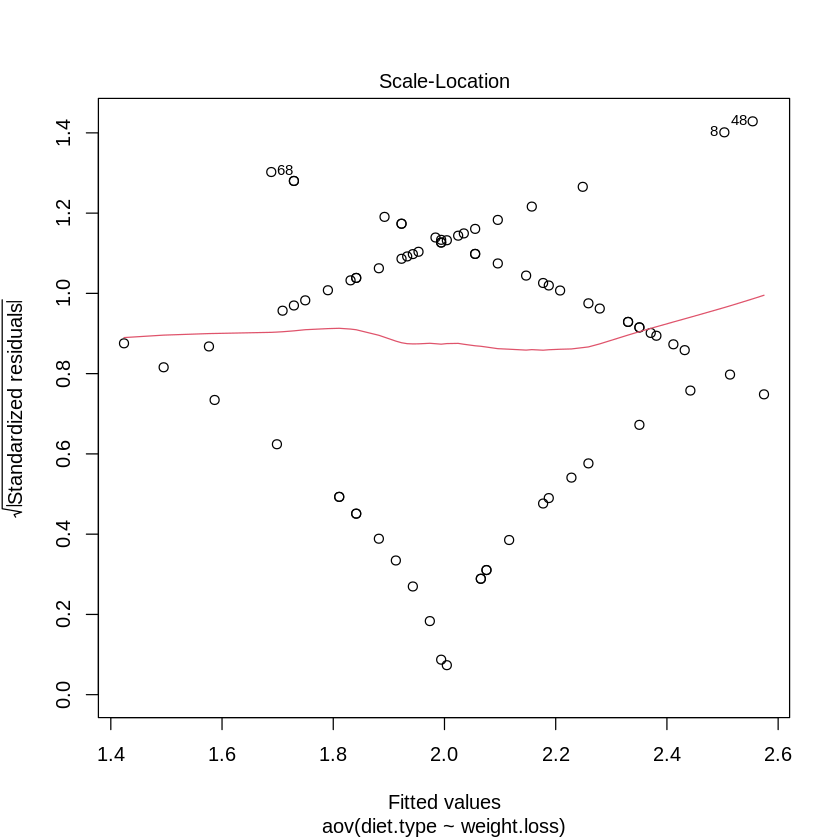

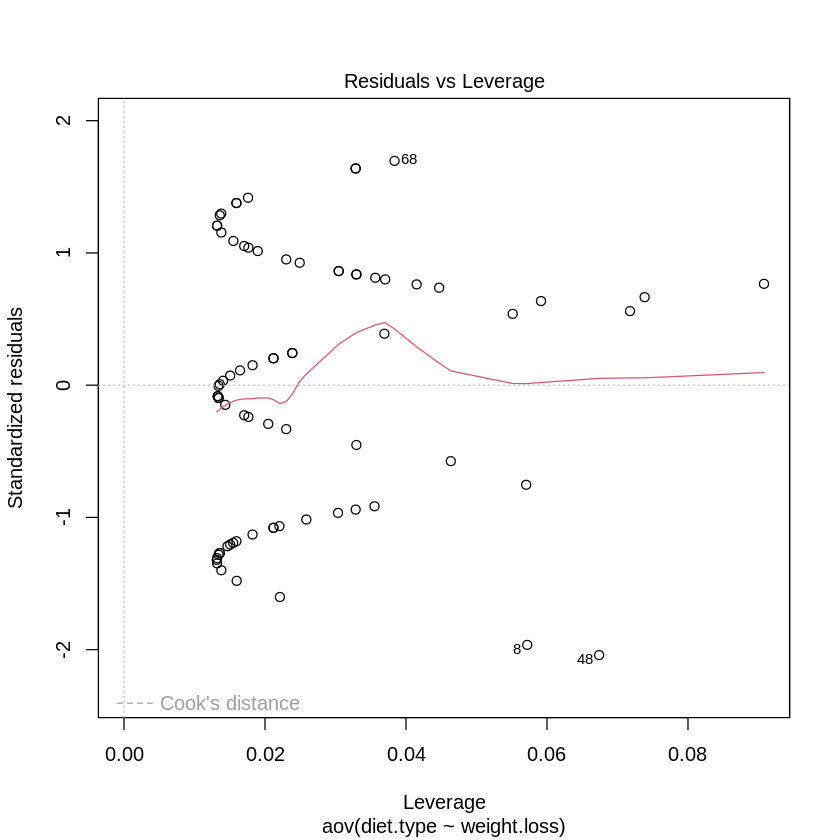

In [ ]:
plot(one.way)

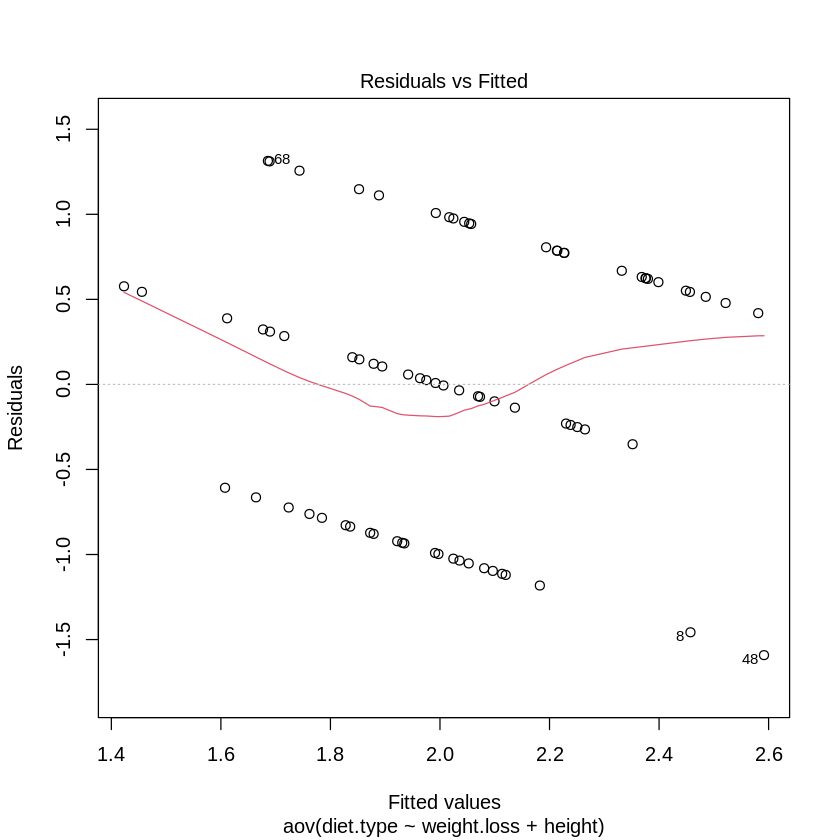

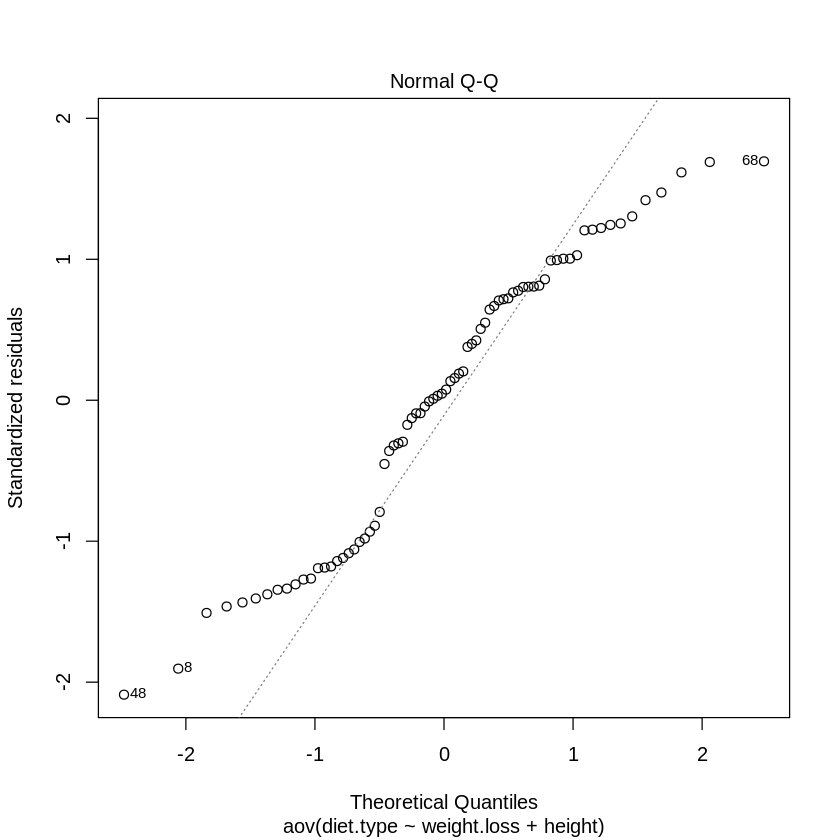

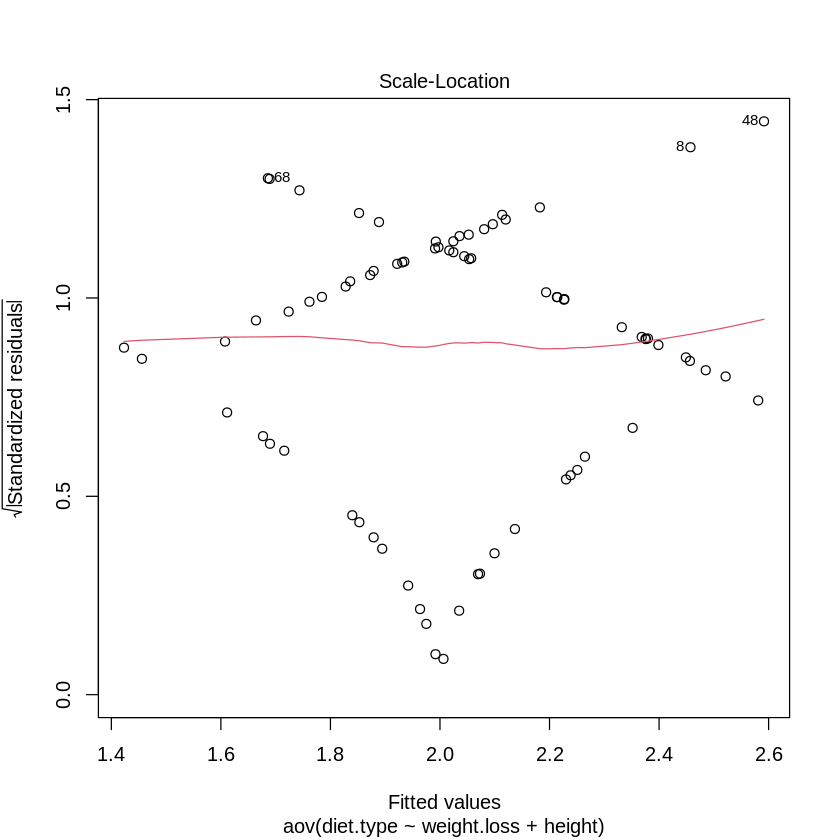

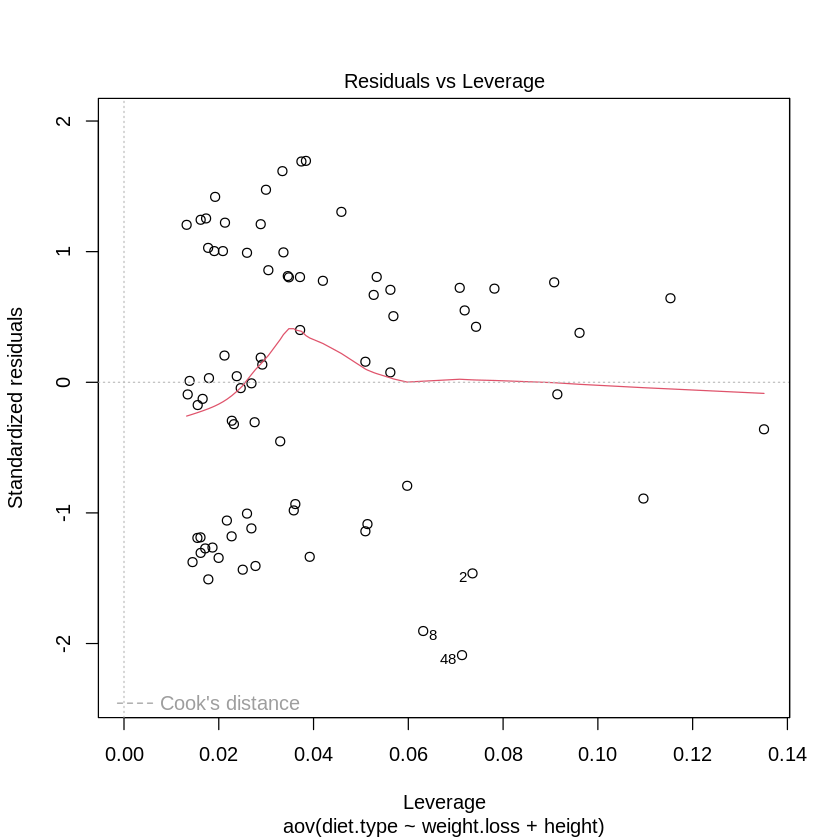

In [ ]:
plot(two.way)

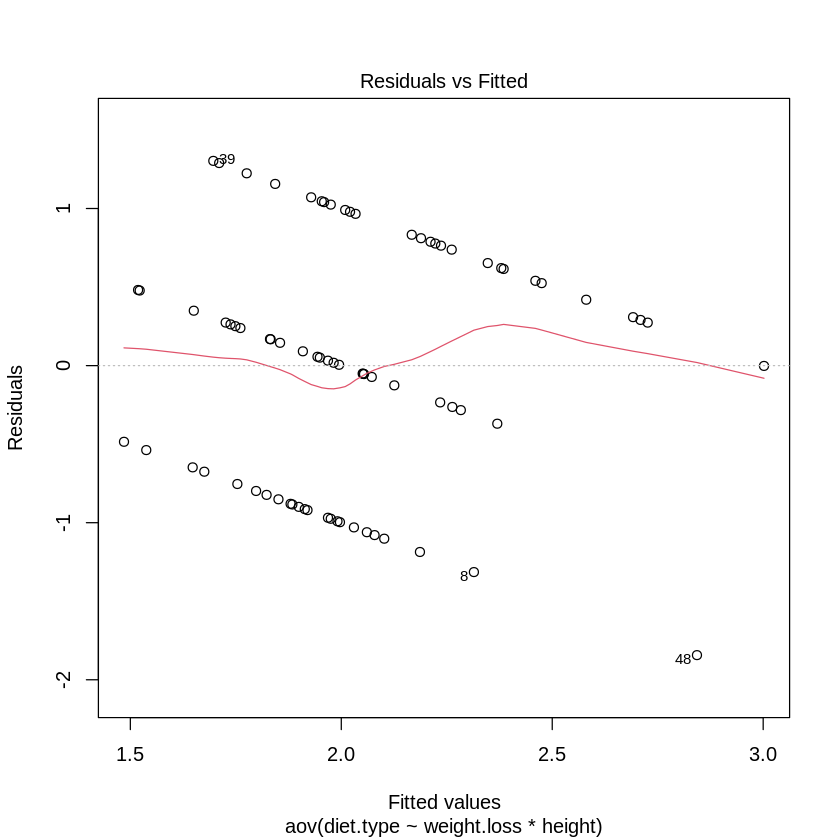

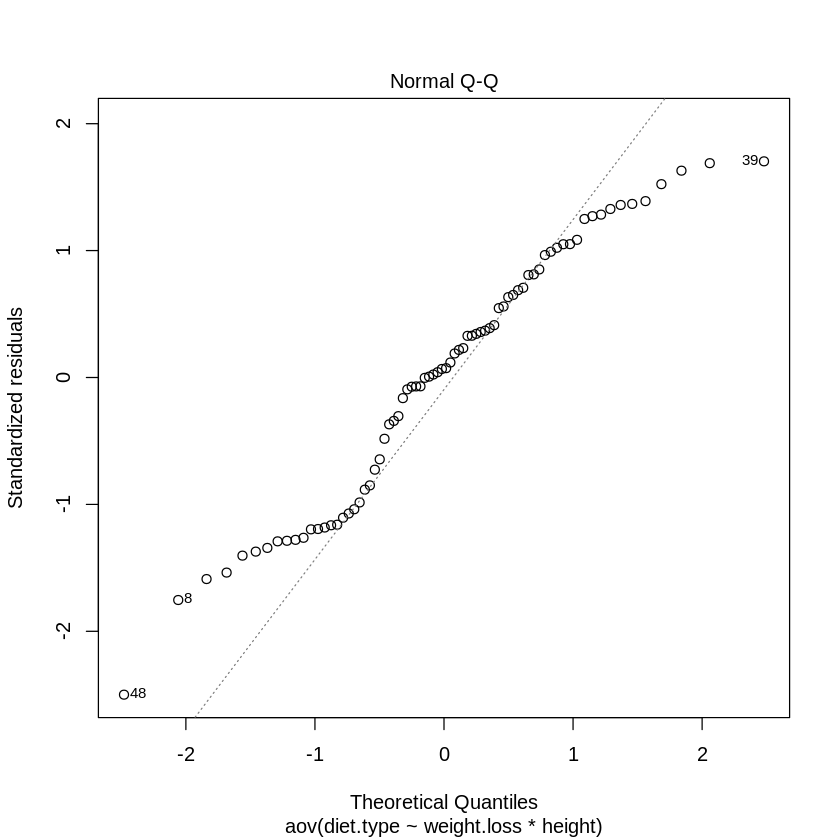

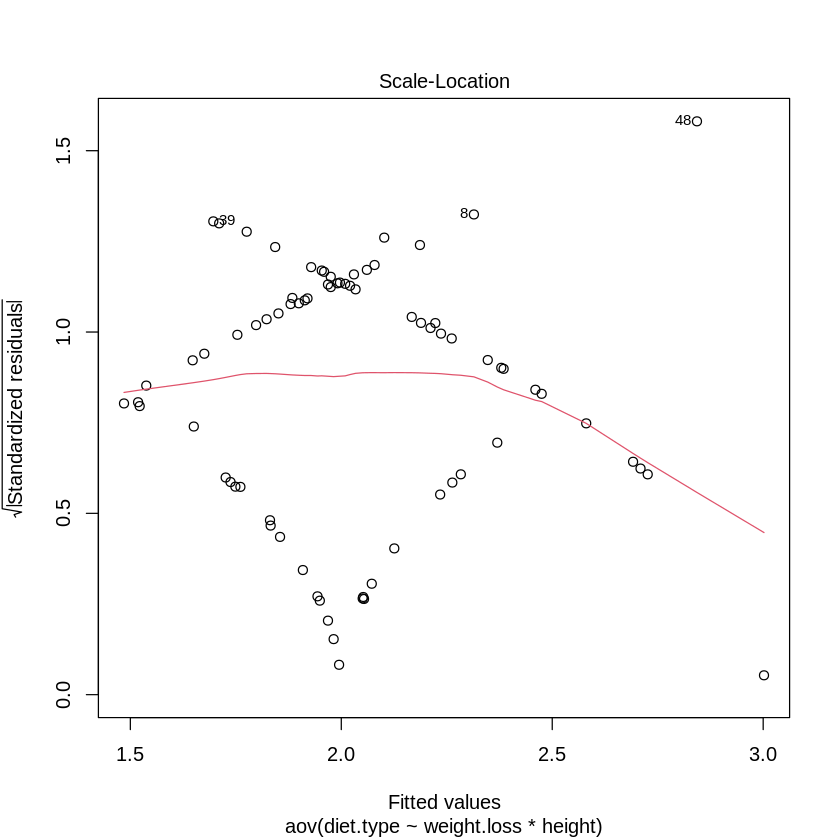

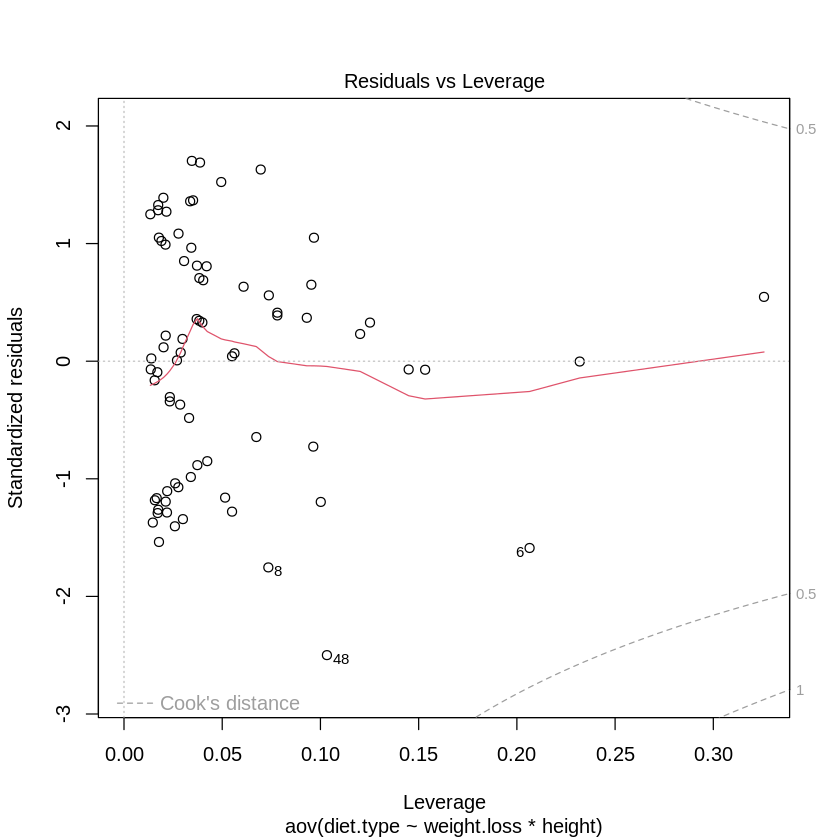

In [ ]:
plot(interaction)